<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-farhan/Optiver_Trading_at_the_close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data import

In [1]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farhanarrafi","key":"0917780b7a86cde57911496fde009830"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/llm-detect-ai-generated-text                  2024-01-22 23:59:00  Featured          $110,000        521           False  
https://www.kaggle.com/competitions/open-problems-single-cell-perturbations       2023-11-30 23:59:00  Featured          $100,000        828           False  
https://www.kaggle.com/competitions/stanford-ribonanza-rna-folding                2023-12-07 23:59:00  Research          $100,000        516            True  
https://www.kaggle.com/competitions/optiver-trading-at-the-close                  2023-12-20 23:59:00  Featured          $100,000       2648            True  
https://www.kaggle.com/competitions/nfl-big-da

In [5]:
! kaggle competitions download -c 'optiver-trading-at-the-close'

 90% 181M/201M [00:00<00:00, 216MB/s]
100% 201M/201M [00:00<00:00, 222MB/s]


In [6]:
! unzip optiver-trading-at-the-close.zip

Archive:  optiver-trading-at-the-close.zip
  inflating: example_test_files/revealed_targets.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
  inflating: optiver2023/__init__.py  
  inflating: optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: public_timeseries_testing_util.py  
  inflating: train.csv               


In [7]:
! rm -rf optiver-trading-at-the-close.zip

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
train_dataset = pd.read_csv('train.csv')

In [10]:
train_dataset_row_17 = train_dataset[train_dataset['stock_id'] == 17]
train_dataset_row_17.head(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
17,17,0,0,12411362.37,-1,1.000966,27288881.25,NaN,NaN,0.999028,12438.00,1.000648,8305.44,1.000000,-3.589988,0,0_0_17
208,17,0,10,11225144.89,-1,1.000445,28475098.73,NaN,NaN,1.000272,691.86,1.001053,3462.00,1.000402,-13.880134,1,0_10_17
399,17,0,20,11225144.89,-1,1.000445,28475098.73,NaN,NaN,1.000330,37708.55,1.001053,3462.00,1.000992,-16.229748,2,0_20_17
590,17,0,30,11225144.89,-1,1.000387,28475098.73,NaN,NaN,1.000359,7265.16,1.000995,7269.78,1.000677,-11.889935,3,0_30_17
781,17,0,40,11360712.60,-1,1.000734,28491353.02,NaN,NaN,1.000503,6574.19,1.001053,3462.00,1.000863,-15.770197,4,0_40_17
972,17,0,50,11328204.02,-1,1.000445,28523861.61,NaN,NaN,1.000359,691.92,1.000763,35302.20,1.000366,-10.740161,5,0_50_17
1163,17,0,60,11328204.02,-1,1.000359,28523861.61,NaN,NaN,1.000330,22832.70,1.000763,52261.10,1.000462,-10.920167,6,0_60_17
1354,17,0,70,11182607.06,-1,0.999549,28669458.56,NaN,NaN,0.999491,345.66,1.000359,23525.28,0.999504,4.689693,7,0_70_17
1545,17,0,80,11193327.98,-1,0.999347,28669458.56,NaN,NaN,0.999028,14165.50,0.999896,41150.20,0.999251,3.169775,8,0_80_17
1736,17,0,90,11169119.46,-1,0.998826,28693667.08,NaN,NaN,0.998768,22451.65,0.999433,6567.16,0.999283,-1.320243,9,0_90_17


# Data Preprocessing

In [11]:
train = train_dataset_row_17.drop(axis='columns', columns=['stock_id', 'date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag', 'reference_price','matched_size','far_price', 'near_price','bid_price','bid_size','ask_price','ask_size','wap','row_id'])

In [12]:
train.tail(5)

,target,time_id
5236997,2.239943,26450
5237197,0.519752,26451
5237397,3.570318,26452
5237597,5.029440,26453
5237797,-2.920031,26454


# Visualisation

<Axes: title={'center': 'Plot of target value of Stock 17 for the first 1 minute'}, xlabel='Time in 10 seconds interval', ylabel='Target value of stock'>

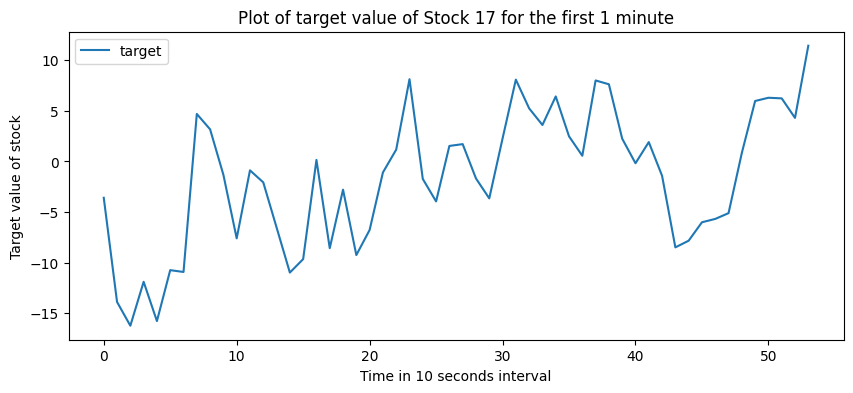

In [13]:
train[0:54].plot(x='time_id', y='target', xlabel='Time in 10 seconds interval', ylabel='Target value of stock', figsize=(10,4), title='Plot of target value of Stock 17 for the first 1 minute')

# Trend Extracting (Moving Average)

In [18]:
moving_average = train['target'].rolling(window=5).mean()

<Axes: >

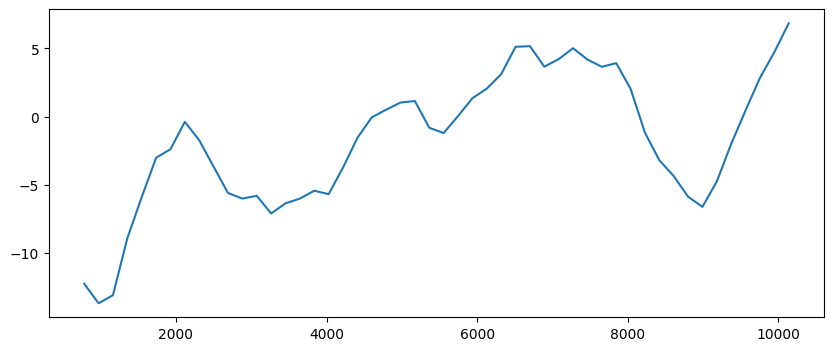

In [19]:
moving_average[0:54].plot(figsize=(10,4))

## Simple Moving Average

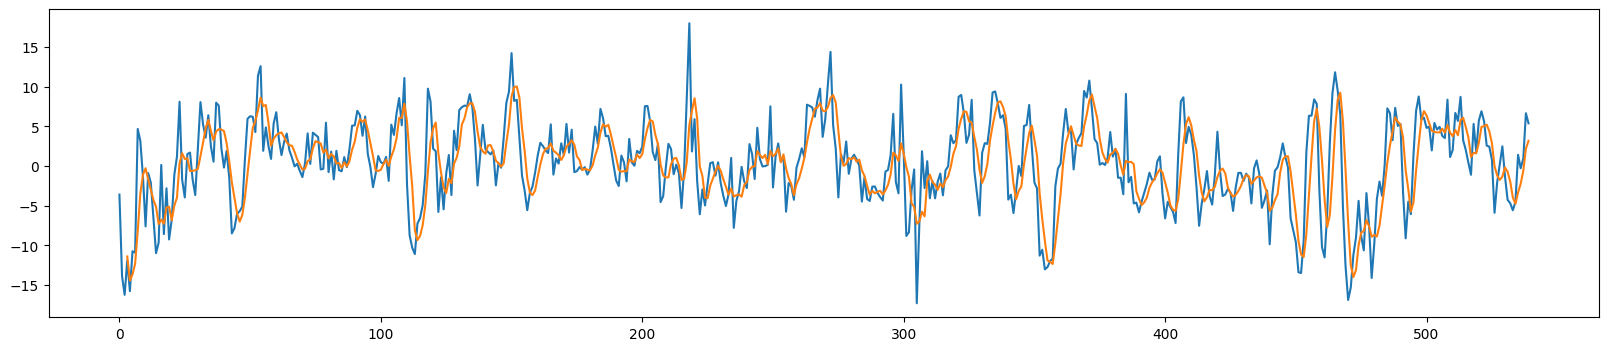

In [30]:
import matplotlib.pyplot as plt

x= train['time_id']
y1 = train['target']
y2 = moving_average

plt.figure(figsize=(20,4))
plt.plot(x[0:540], y1[0:540])
plt.plot(x[0:540],y2[0:540])
plt.show()


## Weighted Moving Average

In [35]:
weights = [0.1,0.2,0.3,0.4]
weighted_moving_average = train['target'].rolling(4).apply(lambda x: sum(weights*x) / sum(weights), raw=True)

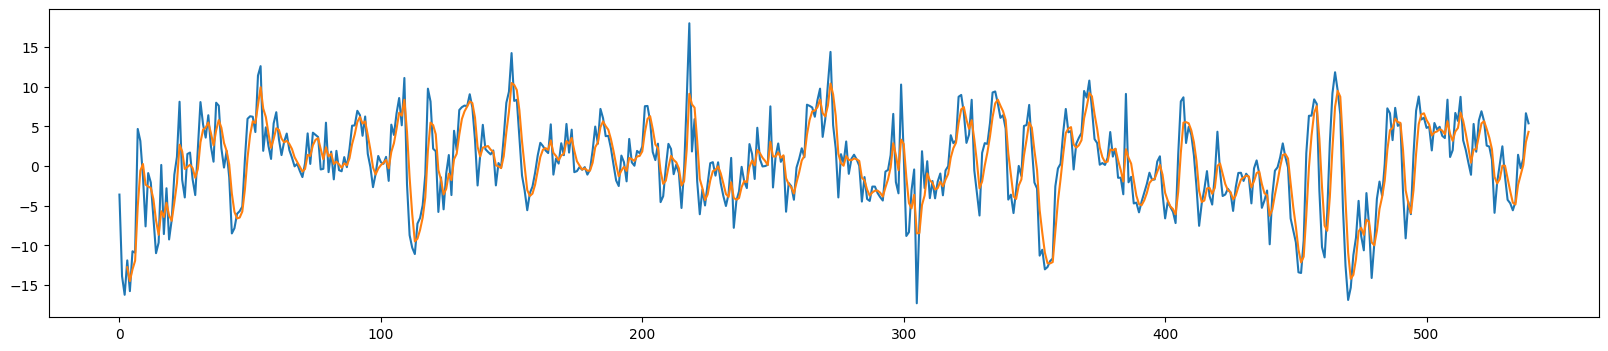

In [36]:
x= train['time_id']
y1 = train['target']
y2 = weighted_moving_average

plt.figure(figsize=(20,4))
plt.plot(x[0:540], y1[0:540])
plt.plot(x[0:540],y2[0:540])
plt.show()

In [37]:
## Exponential Smoothing (Exponential Moving Average)

In [38]:
exponential_smoothing = train['target'].ewm(span=4, adjust=False).mean()

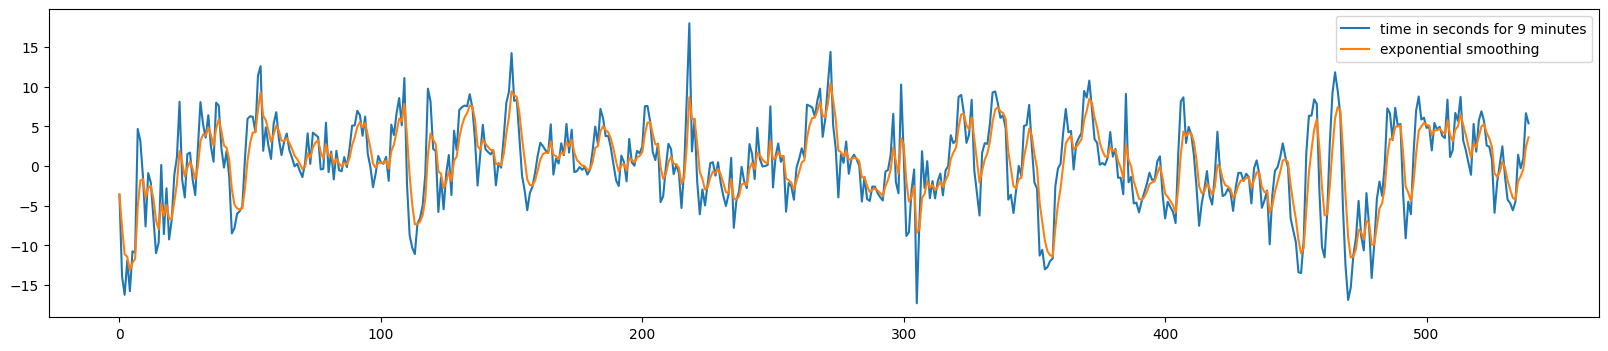

In [46]:
x= train['time_id']
y1 = train['target']
y2 = exponential_smoothing

plt.figure(figsize=(20,4))
plt.plot(x[0:540], y1[0:540], label = 'target value')
plt.plot(x[0:540],y2[0:540], label='exponential smoothing')
plt.legend()
plt.show()

# De-Trending the time series

In [40]:
detrended_target = train['target'] - exponential_smoothing

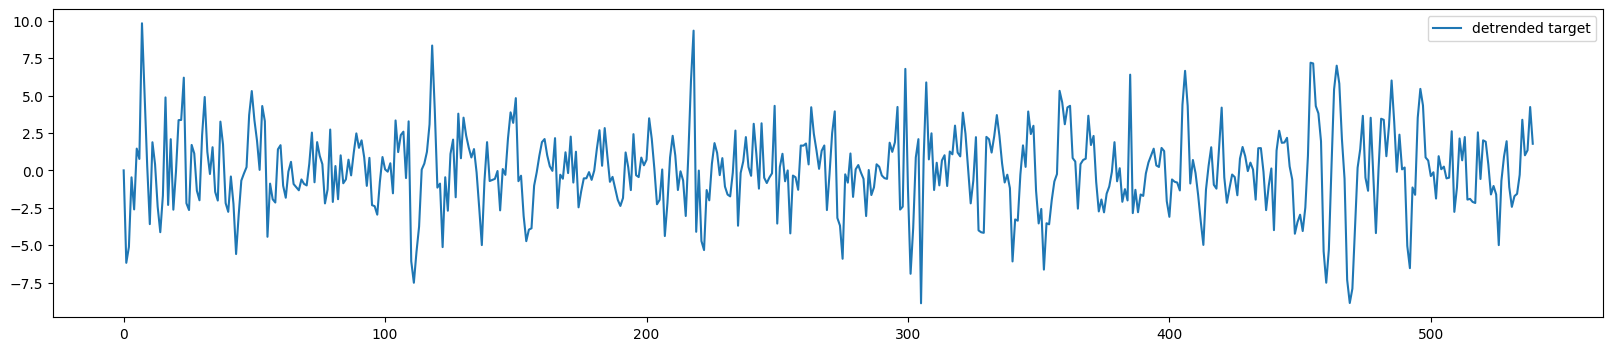

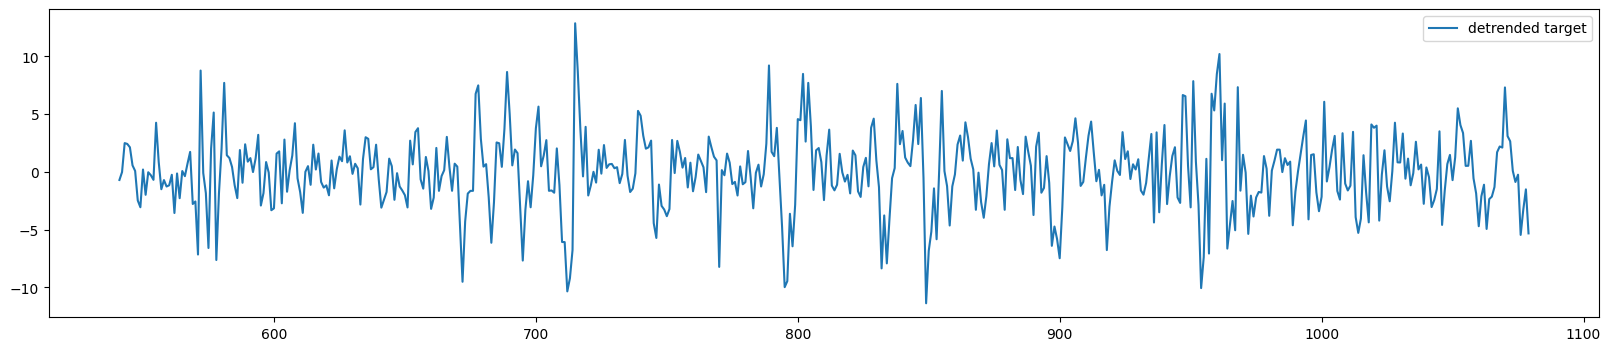

In [51]:
x= train['time_id']
#y1 = train['target']
y2 = detrended_target

plt.figure(figsize=(20,4))
#plt.plot(x[0:540], y1[0:540], label='target value')
plt.plot(x[0:540],y2[0:540], label='detrended target')
plt.legend()
plt.show()

plt.figure(figsize=(20,4))
plt.plot(x[541:1080],y2[541:1080], label='detrended target')
plt.legend()
plt.show()

# Testing

In [16]:
import optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

# References:


1.   [Testing code source](https://www.kaggle.com/code/jirkaborovec/optiver-eda-pytorch-models)
2.   [Moving Average source](https://medium.com/@HalderNilimesh/applied-data-science-for-beginners-how-to-calculate-moving-average-using-pandas-dataframe-in-7e5f7944c07a)

